<a href="https://colab.research.google.com/github/angiest1711/Spatial-Python---Tenerife-Wildfires/blob/main/TENERIFE_WILDFIRES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of the Burned Area in the Tenerife Wildfires 2023

Angie Torres, EAGLE Student, Universität Würzburg, Spatial Python.

Tenerife is part of the Archipelago of the Canary Islands and the biggest island from it, with an aproximate area of 2034 km2. It has a variate topography ranging from 0m to 3715 m which influences changes in weather conditions depending on it.

Even though the island does not recieve a considerably amount od rainfall per year, the north part of the island has a wetter condition due to the topography while the south tends to be dryer.

In August 2023, the island suffered and by the time this is being written is still suffering from wildfires, being one of the worst wildfires the island has experimented.

Through this notebook the burned areas are going to be identified for October 7th 2023 and comparing it with a prefire state of the island and observe side to side the effects of the wildfires in the area.

### Data
* Sentinel 2 images acquired from the Open Acces Hub of Copernicus
* The shapefile used for the analysis was digitilized in Qgis

**Mount Google Drive to Access Stored Data**

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installation and importing necessary packages and libraries**

In [ ]:
!apt-get install -y python3-gdal
!pip install osr ogr gdal numpy matplotlib rasterio shapely geopandas


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  gdal-bin python-numpy-doc python3-pytest
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,434 kB of archives.
After this operation, 23.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.4.3+dfsg-1~jammy0 [967 kB]
Fetched 4,434 kB in 1s (4,546 kB/s)
Selecting previously unselected package python3-numpy.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../python3-numpy_1%3a1.21.5-1ubuntu22.04.1_amd64.deb ...
Unpacking python3-numpy (1:1.21.5-1ubuntu22

In [ ]:
import osgeo
from osgeo import gdal, osr, ogr
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd
import math
from shapely.geometry import box

**Loading Area of Interest, Tenerife**
1. Vector Files

In [ ]:
tenerife_shp=gpd.read_file("/content/drive/MyDrive/PYTHON/SHP/tenerife.shp")

In [ ]:
tenerife_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

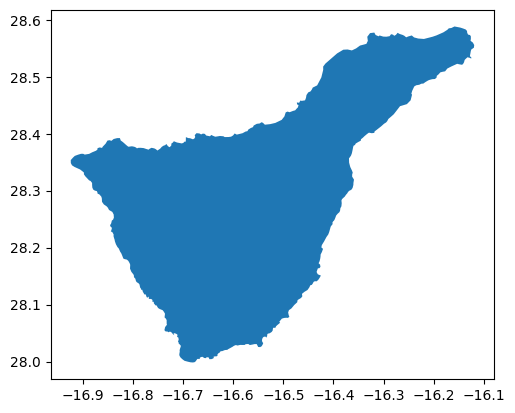

In [ ]:
tenerife_shp.plot()

2. Raster Files

In [ ]:
#Pre Fire Bands
b2_pre=rasterio.open("/content/drive/MyDrive/PYTHON/bands_pre_fire/B2_pre.tif")
b3_pre=rasterio.open("/content/drive/MyDrive/PYTHON/bands_pre_fire/B3_pre.tif")
b4_pre=rasterio.open("/content/drive/MyDrive/PYTHON/bands_pre_fire/B4_pre.tif")
b8A_pre=rasterio.open("/content/drive/MyDrive/PYTHON/bands_pre_fire/B8A_pre.tif")
b12_pre=rasterio.open("/content/drive/MyDrive/PYTHON/bands_pre_fire/B12_pre.tif")

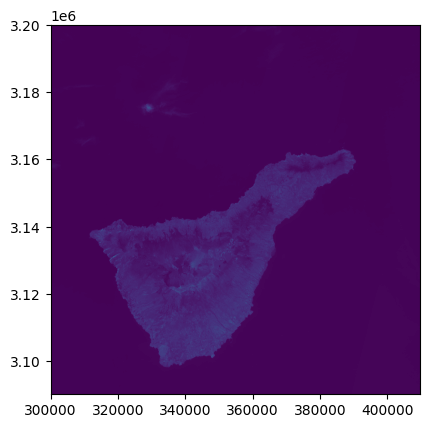

<Axes: >

In [ ]:
#Fire Bands
b2_fire=rasterio.open("/content/drive/MyDrive/PYTHON/bands_fire/B2.tif")
b3_fire=rasterio.open("/content/drive/MyDrive/PYTHON/bands_fire/B3.tif")
b4_fire=rasterio.open("/content/drive/MyDrive/PYTHON/bands_fire/B4.tif")
b8A_fire=rasterio.open("/content/drive/MyDrive/PYTHON/bands_fire/B8A.tif")
b12_fire=rasterio.open("/content/drive/MyDrive/PYTHON/bands_fire/B12.tif")
show(b12_fire)

**Reprojection**

In [ ]:
print("Shapefile CRS:", tenerife_shp.crs)
print("Raster CRS:", b2_fire.crs)
print("Raster CRS:", b3_fire.crs)
print("Raster CRS:", b4_fire.crs)
print("Raster CRS:", b8A_fire.crs)
print("Raster CRS:", b12_fire.crs)

Shapefile CRS: EPSG:4326
Raster CRS: EPSG:32628
Raster CRS: EPSG:32628
Raster CRS: EPSG:32628
Raster CRS: EPSG:32628
Raster CRS: EPSG:32628


In [ ]:
tenerife_shp = tenerife_shp.to_crs(b2_fire.crs)

In [ ]:
geometry = tenerife_shp.geometry.values[0]

**Cropping Raster Files to the AoI**

In [ ]:
#Prefire
b2_crop_p, _ = mask(b2_pre, [mapping(geometry)], crop=True)
b3_crop_p, _ = mask(b3_pre, [mapping(geometry)], crop=True)
b4_crop_p, _ = mask(b4_pre, [mapping(geometry)], crop=True)
b8A_crop_p, _ = mask(b8A_pre, [mapping(geometry)], crop=True)
b12_crop_p, _ = mask(b12_pre, [mapping(geometry)], crop=True)

In [ ]:
b2_pre_data = b2_crop_p[0]
b3_pre_data = b3_crop_p[0]
b4_pre_data = b4_crop_p[0]
b8A_pre_data = b8A_crop_p[0]
b12_pre_data = b12_crop_p[0]

In [ ]:
#Fire
b2_crop_f, _ = mask(b2_fire, [mapping(geometry)], crop=True)
b3_crop_f, _ = mask(b3_fire, [mapping(geometry)], crop=True)
b4_crop_f, _ = mask(b4_fire, [mapping(geometry)], crop=True)
b8A_crop_f, _ = mask(b8A_fire, [mapping(geometry)], crop=True)
b12_crop_f, _ = mask(b12_fire, [mapping(geometry)], crop=True)

In [ ]:
b2_fire_data = b2_crop_f[0]
b3_fire_data = b3_crop_f[0]
b4_fire_data = b4_crop_f[0]
b8A_fire_data = b8A_crop_f[0]
b12_fire_data = b12_crop_f[0]

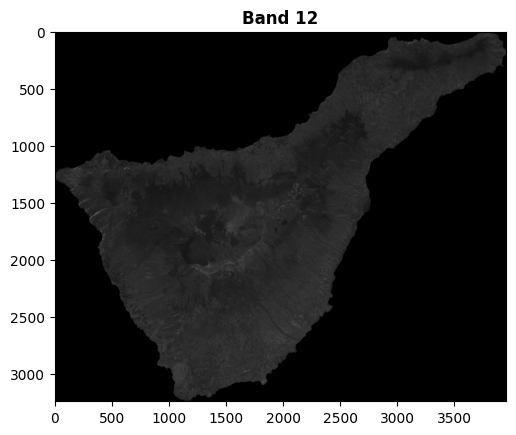

<Axes: title={'center': 'Band 12'}>

In [ ]:
show(b12_fire_data, cmap='gray', title='Band 12')


**NDVI Calculation**

In [ ]:
# Convert bands to floating-point numbers

b8A_pre_data = b8A_crop_p[0].astype('float32')
b4_pre_data = b4_crop_p[0].astype('float32')

b8A_fire_data = b8A_crop_f[0].astype('float32')
b4_fire_data = b4_crop_f[0].astype('float32')

# Calculate NDVI
ndvi_pre = (b8A_pre_data - b4_pre_data) / (b8A_pre_data + b4_pre_data)

ndvi_fire = (b8A_fire_data - b4_fire_data) / (b8A_fire_data + b4_fire_data)

<ipython-input-36-8d7541540949>:10: RuntimeWarning: invalid value encountered in divide
  ndvi_pre = (b8A_pre_data - b4_pre_data) / (b8A_pre_data + b4_pre_data)
<ipython-input-36-8d7541540949>:12: RuntimeWarning: invalid value encountered in divide
  ndvi_fire = (b8A_fire_data - b4_fire_data) / (b8A_fire_data + b4_fire_data)


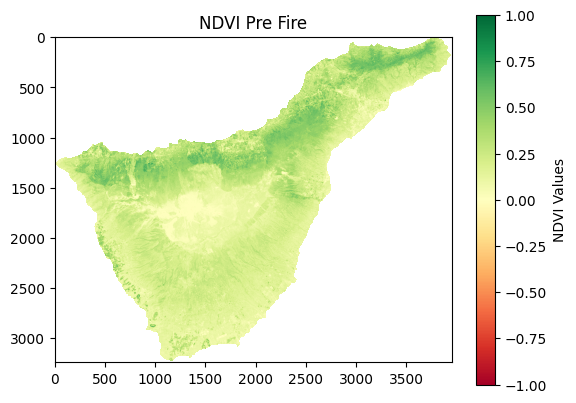

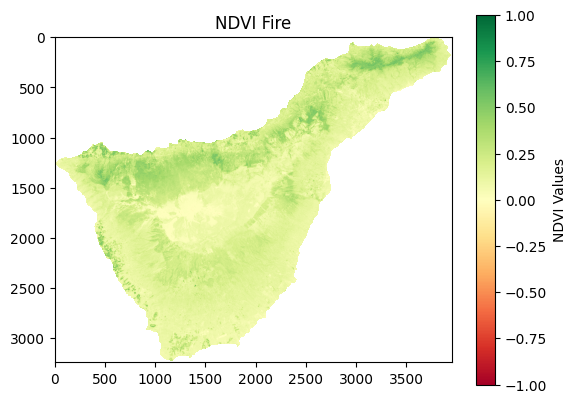

In [ ]:
# Display NDVI
plt.imshow(ndvi_pre, cmap='RdYlGn', vmin=-1, vmax= 1)
plt.title('NDVI Pre Fire')
plt.colorbar(label='NDVI Values')
plt.show()

plt.imshow(ndvi_fire, cmap='RdYlGn',vmin=-1, vmax= 1)
plt.title('NDVI Fire')
plt.colorbar(label='NDVI Values')
plt.show()


**NBR (Normalized Burn Ratio) Calculation**

In [ ]:
#Pre Fire
b8A_pre_data = b8A_crop_p[0].astype('float32')
b12_pre_data = b12_crop_p[0].astype('float32')
nbr_pre = (b8A_pre_data - b12_pre_data) / (b8A_pre_data + b12_pre_data)
#Fire
b8A_fire_data = b8A_crop_f[0].astype('float32')
b12_fire_data = b12_crop_f[0].astype('float32')
nbr_fire = (b8A_fire_data - b12_fire_data) / (b8A_fire_data + b12_fire_data)

<ipython-input-39-7bfb8b26e477>:4: RuntimeWarning: invalid value encountered in divide
  nbr_pre = (b8A_pre_data - b12_pre_data) / (b8A_pre_data + b12_pre_data)
<ipython-input-39-7bfb8b26e477>:8: RuntimeWarning: invalid value encountered in divide
  nbr_fire = (b8A_fire_data - b12_fire_data) / (b8A_fire_data + b12_fire_data)


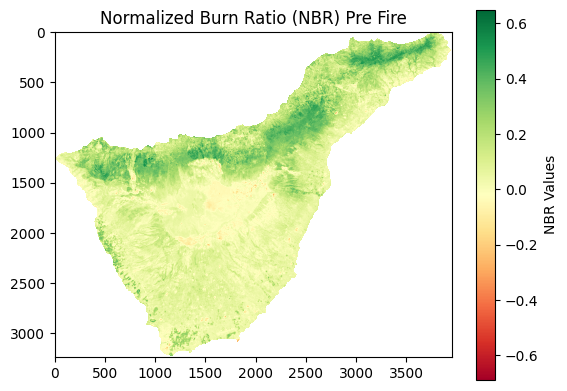

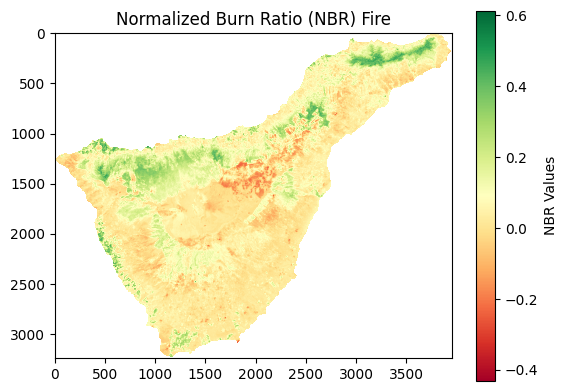

In [ ]:
#Display NBR

plt.imshow(nbr_pre, cmap='RdYlGn')
plt.title('Normalized Burn Ratio (NBR) Pre Fire')
plt.colorbar(label='NBR Values')
plt.show()

plt.imshow(nbr_fire, cmap='RdYlGn')
plt.title('Normalized Burn Ratio (NBR) Fire')
plt.colorbar(label='NBR Values')
plt.show()

In the plots we can see a change in values between time, in which indicates the severity of the fires in the red north center area. As the north area of the island is wetter than the south, the vegetation acts as a fuel making the spread of the fire even worse.

The area affected by fires in October 7th was 5426.16 hectares. The area could variate because of the time extension of the fires.

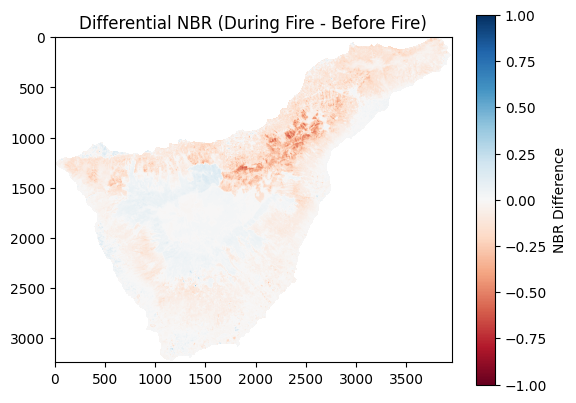

In [ ]:
#Differential NBR
nbr_diff = nbr_fire - nbr_pre

# Display
plt.imshow(nbr_diff, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Differential NBR (During Fire - Before Fire)')
plt.colorbar(label='NBR Difference')
plt.show()


**Burned Areas**

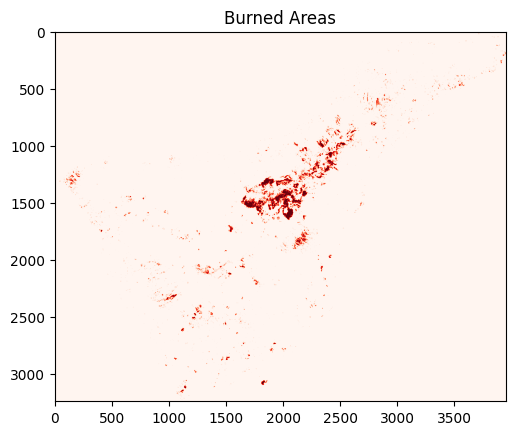

In [ ]:
# Threshold for burned areas
burned_mask = nbr_fire < -0.1

# Display the burned areas
plt.imshow(burned_mask, cmap='Reds')
plt.title('Burned Areas')
plt.show()


In [ ]:
burned_area_pixels = np.sum(burned_mask)

#Resolution
pixel_resolution = 400

# Calculate burned area in hectares
burned_area_h = (burned_area_pixels * pixel_resolution)/10000

print(f'Burned Area: {burned_area_h:.2f} hectares')


Burned Area: 5426.16 hectares
